Diferenciacion numerica y calculodel jacobiano numerico

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

funciones de utileria

In [9]:
## Solución de la ecuación de Lazo cerrado para un mecanismo de 4 barras

def rad(grad):
    return np.pi*grad/180.0

def grad(r):
    return r*180.0/np.pi

def diff(f,x,i ,h=1e-6):
    "i=numero entero de 0,...,N-1(numero de columnas -1)"
    fx = f(x)
    x[i] = x[i] +h
    fxh = f(x)
    return (fxh-fx)/h

def jacn(f,x, h=1e-6):
    N = len(x) #Columnas
    M = len(f(x))
    
    J = np.zeros((N, M))
    for i in range(N):
        J[:,i] = diff(f,x,i,h)
    
    return J

def nr_multi(f,xi,jac, tol=1e-6, iter_max=1000, params=[] ):
    i = 0
    while abs(f(xi, params).dot(f(xi, params))) >= tol:
        if i > iter_max:
            break
            
        i += 1 
        xi = xi - np.linalg.solve(jac(xi),f(xi, params))
        print("x(%i)="%i +str(xi))
    return xi



def plot_barras(L, theta):
    O1_x = 0
    O1_y = 0
    
    A_x = L[1]*np.cos(theta[1])
    A_y = L[1]*np.sin(theta[1])
    
    B_x = A_x + L[2]*np.cos(theta[2])
    B_y = A_y + L[2]*np.sin(theta[2])
    
    O3_x = L[0]*np.cos(theta[0])
    O3_y = L[0]*np.sin(theta[0])
    
    B1_x = O3_x + L[3]*np.cos(theta[3])
    B1_y = O3_y + L[3]*np.sin(theta[3])
    
    #plt.plot([x1,x2], [y1,y2], label="etiqueta")
    plt.title("Mecanismo de 4 barras")
    plt.grid()
    
    plt.plot([O1_x, A_x], [O1_y, A_y] , label="barra1")
    plt.plot([A_x , B_x ], [A_y, B_y ] , label="barra2")
    plt.plot([O3_x , B1_x ], [O3_y, B1_y ] , label="barra3")
    plt.plot([O1_x , O3_x ], [O1_y, O3_y ] , label="barra0")
    
    plt.legend(loc="best")
    plt.xlim([-20,150])
    plt.ylim([-100,100])
    plt.show()




## Solución de la ecuación de Lazo cerrado para un mecanismo de 4 barras
$$f_1= L_1 \cdot cos(\theta_1) + L_2 \cdot cos(\theta_2) - L_0 \cdot cos(\theta_0) - L_3 \cdot cos(\theta_3) = 0 $$
$$f_2= L_1 \cdot sin(\theta_1) + L_2 \cdot sin(\theta_2) - L_0 \cdot sin(\theta_0) - L_3 \cdot sin(\theta_3) = 0 $$

$$
Jac F = 
 \begin{bmatrix}
  - L_2 sin(\theta_2) & L_3 sin(\theta_3) \\
  L_2 cos(\theta_2) & - L_3 cos(\theta_3)
 \end{bmatrix}
 $$

Parametros del mecanismo:
$$ L_0 = 100 mm (tierra) $$
$$ L_1 = 40 mm (manivela)$$
$$ L_2 = 120 mm (conectora) $$
$$ L_3 = 80 mm (Salida) $$

Para valores de manivela de $\theta_1 = 40°$, que valores de $\theta_2$ y $\theta_3$ cierran el mecanismo?
La solución es $\theta_3 = 57.33°$ y $\theta_2 = 20.30°$

In [3]:
def mec_4barras_pos(x, params=[]):
    
    t1 = params[0]
    "x esta en radianes"
    L0 = 100 #mm
    L1 = 40 #mm
    L2 = 120 #mm
    L3 = 80 #mm
    
    theta0 = rad(0) # barra de tierra
    theta1 = t1# rad(40) # Angulo de entrada
    
    #Incognitas
    theta2 = x[0] 
    theta3 = x[1]
    
    eq1 = L1*np.cos(theta1) + L2*np.cos(theta2) - L0*np.cos(theta0) - L3*np.cos(theta3)
    eq2 = L1*np.sin(theta1) + L2*np.sin(theta2) - L0*np.sin(theta0) - L3*np.sin(theta3)
    
    return np.array([eq1,eq2])


def barras_pos_(x):
    L = np.array([100,40,120,80])
    theta = np.array([rad(0),rad(40), x[0] ,x[1]]) 
    return np.array([
        L[1]*np.cos(theta[1]) + L[2]*np.cos(theta[2]) - L[0]*np.cos(theta[0]) - L[3]*np.cos(theta[3]),
        L[1]*np.sin(theta[1]) + L[2]*np.sin(theta[2]) - L[0]*np.sin(theta[0]) - L[3]*np.sin(theta[3])
    ])

In [4]:
mec_4barras_pos([rad(20.30),rad(57.33)], params=[rad(40)])

array([0.00447928, 0.00029972])

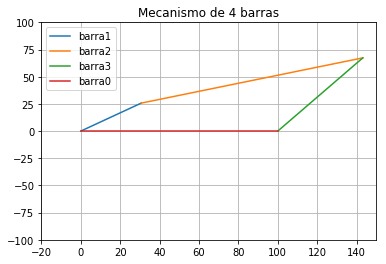

In [5]:
plot_barras([100, 40, 120, 80], [0, rad(40), rad(20.30), rad(57.33)])

In [6]:
def jacobiano_numerico(x):
    return jacn(mec_4barras_pos,x)

def jacobiano_sim(x):
    L2 = 120
    L3 = 80

    theta2 = x[0]
    theta3 = x[1]
    
    return np.array( [
        [-L2*np.sin(theta2)   , L3*np.sin(theta3)   ],
        [ L2*np.cos(theta2)  , -L3*np.cos(theta3)   ]
    ])


In [10]:
@interact(t1=(0.0,360.0,1.0))
def p(t1):
    #newton-rhapson? t2, t3
    r = nr_multi(mec_4barras_pos,[20,10],jacobiano_sim, tol=1e-6, iter_max=100, params=[rad(t1)])
    print(grad(r))
    plot_barras([100, 40, 120, 80], [0, rad(t1), r[0], r[1]])
    

interactive(children=(FloatSlider(value=180.0, description='t1', max=360.0, step=1.0), Output()), _dom_classes…

In [8]:
jacobiano_numerico([1,1])

IndexError: list index out of range

In [ ]:
jacobiano_sim([1,1])